# London Weather EDA

In this dataset, we will be looking at the various weather attributes provided by the European Climate Assessment & Dataset (ECA&D) and explore their relationship with one another. The measurements of this particular dataset were recorded by a weather station near Heathrow airport in London, UK.

## Table of Contents
[1. Loading various libraries & dataset](#1.-Loading-various-libraries-&-dataset) <br>
- [Data dictionary](#Data-dictionary)
- [Exploring the dataset](#Exploring-the-dataset)


[2. Run a Linear regression model on mean_temp](#2.-Run-a-Linear-regression-model-on-mean_temp) <br>
- [Linearity](#Linearity) 
- [Model Iterations](#Model-Iterations)
- [Residuals](#Residuals)
- [Homoscedasticity](#Homoscedasticity)


[3. Conclusion](#3.-Conclusion) <br>

[4. Further EDA](#4.-Further-EDA) <br>


## 1. Loading various libraries & dataset

In [1]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Read in data
lw_df = pd.read_csv('C:\\Users\\mitth\\OneDrive\\Desktop\\Data Analysis\\Brain_station\\Data_Science_Bootcamp\\Projects\\Capstone\\london_weather.csv')

### Data dictionary
#### Variables

- `date` - recorded date of measurement 
- `cloud_cover` - cloud cover measurement in oktas 
- `sunshine` - sunshine measurement in hours (hrs) 
- `global_radiation` - irradiance measurement in Watt per square meter (W/m2) 
- `max_temp` - maximum temperature recorded in degrees Celsius (°C) 
- `mean_temp` - mean temperature in degrees Celsius (°C)
- `min_temp` - minimum temperature recorded in degrees Celsius (°C) 
- `precipitation` - precipitation measurement in millimeters (mm) 
- `pressure` - pressure measurement in Pascals (Pa) 
- `snow_depth` - snow depth measurement in centimeters (cm) 

### Exploring the dataset

In [3]:
lw_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
lw_df.sample(75)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
11241,20091011,6.0,1.2,57.0,15.9,13.5,11.4,0.6,101580.0,0.0
2508,19851113,0.0,7.8,75.0,8.3,1.3,-4.1,0.0,102270.0,0.0
12743,20131121,4.0,2.1,37.0,8.2,5.8,3.3,0.0,100450.0,0.0
558,19800712,7.0,1.9,141.0,17.7,14.6,11.7,0.3,102000.0,0.0
7224,19981012,4.0,8.7,126.0,17.8,12.8,9.5,0.8,101570.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3869,19890805,2.0,13.5,297.0,29.3,19.4,12.0,0.0,101010.0,0.0
5593,19940425,5.0,7.6,211.0,19.1,9.0,3.6,0.0,101160.0,0.0
2606,19860219,7.0,1.5,50.0,1.9,0.4,-1.9,0.0,101610.0,0.0
6424,19960803,3.0,12.8,290.0,25.5,18.2,12.5,0.0,102800.0,0.0


In [5]:
lw_df.shape

(15341, 10)

In [6]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### Convert Dtype on `date`

In [7]:
# Convert 'Date' column from int64 to datetime 
lw_df['date'] = pd.to_datetime(lw_df['date'].astype(str), format='%Y%m%d')

In [8]:
lw_df['date'].dtype

dtype('<M8[ns]')

In [9]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


### Null values

Other than 'date' and 'sunshine', all other columns have missing values

'Snow depth' specifically has quite a few missing. How to handle it? Do i assume they were rows that should've had '0' in it? Do I remove them? Will need to explore further to see if removing those rows are benefitial. 

In [10]:
# Count total values in the column
total_values = len(lw_df['snow_depth'])

# Count null values in the column
null_values = lw_df['snow_depth'].isnull().sum()

# Calculate the percentage of null values
percentage_null = (null_values / total_values) * 100

In [11]:
percentage_null

9.393129522195425

9.39% of 'snow_depth' data is missing. Let's graph them out.

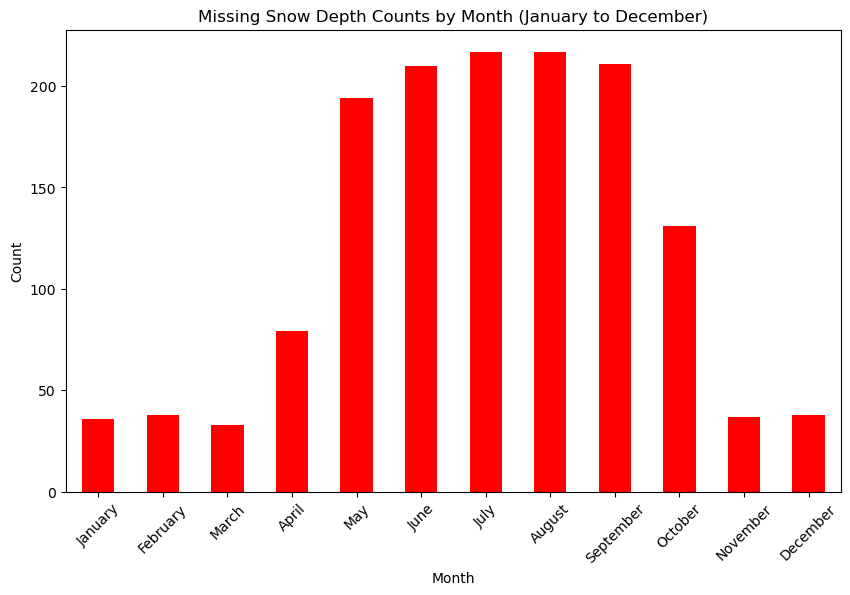

In [12]:
# Let's graph out the missing snow depth values and group them by month
missing_dates = lw_df[lw_df['snow_depth'].isnull()]['date']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing snow depth per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing snow depth counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Snow Depth Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

Perhaps try inputing the mean into all the null values for all the columns.

In [13]:
mean_snow_depth = lw_df['snow_depth'].mean()

# Impute the mean value to all null 'snow_depth' values
lw_df['snow_depth'].fillna(mean_snow_depth, inplace=True)

In [14]:
# Counting the missing Values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover         19
sunshine             0
global_radiation    19
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

Let's do it with the rest

In [15]:
# Null values for cloud cover
mean_cloud_cover = lw_df['cloud_cover'].mean()

# Impute the mean value to all null 'cloud_cover' values
lw_df['cloud_cover'].fillna(mean_cloud_cover, inplace=True)

In [16]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation    19
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [17]:
# Null values for global radiation
mean_global_radiation = lw_df['global_radiation'].mean()

# Impute the mean value to all null 'global_radiation' values
lw_df['global_radiation'].fillna(mean_global_radiation, inplace=True)

In [18]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation     0
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [19]:
# Null values for max temp
mean_max_temp = lw_df['max_temp'].mean()

# Impute the mean value to all null 'max_temp' values
lw_df['max_temp'].fillna(mean_global_radiation, inplace=True)

In [20]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation     0
max_temp             0
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [21]:
# Null values for mean temp
mean_mean_temp = lw_df['mean_temp'].mean()

# Impute the mean value to all null 'mean_temp' values
lw_df['mean_temp'].fillna(mean_mean_temp, inplace=True)

In [22]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            2
precipitation       6
pressure            4
snow_depth          0
dtype: int64

In [23]:
# Null values for min temp
mean_min_temp = lw_df['min_temp'].mean()

# Impute the mean value to all null 'min_temp' values
lw_df['min_temp'].fillna(mean_min_temp, inplace=True)

In [24]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       6
pressure            4
snow_depth          0
dtype: int64

In [25]:
# Null values for precipitation
mean_precipitation = lw_df['precipitation'].mean()

# Impute the mean value to all null 'precipitation' values
lw_df['precipitation'].fillna(mean_precipitation, inplace=True)

In [26]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            4
snow_depth          0
dtype: int64

In [27]:
# Null values for pressure
mean_pressure = lw_df['pressure'].mean()

# Impute the mean value to all null 'pressure' values
lw_df['pressure'].fillna(mean_pressure, inplace=True)

In [28]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [29]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15341 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15341 non-null  float64       
 4   max_temp          15341 non-null  float64       
 5   mean_temp         15341 non-null  float64       
 6   min_temp          15341 non-null  float64       
 7   precipitation     15341 non-null  float64       
 8   pressure          15341 non-null  float64       
 9   snow_depth        15341 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


### Check for duplicates

In [30]:
number_of_duplicates = lw_df.duplicated().sum()
number_of_duplicates

0

In [31]:
lw_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,15341,2000-01-01 00:00:00,1979-01-01 00:00:00,1989-07-02 00:00:00,2000-01-01 00:00:00,2010-07-02 00:00:00,2020-12-31 00:00:00,NaN
cloud_cover,15341.0,5.268242,0.0,4.0,6.0,7.0,9.0,2.06879
sunshine,15341.0,4.350238,0.0,0.5,3.5,7.2,16.0,4.028339
global_radiation,15341.0,118.756951,8.0,41.0,95.0,186.0,402.0,88.8432
max_temp,15341.0,15.429206,-6.2,10.5,15.0,20.3,118.756951,6.86481
mean_temp,15341.0,11.475511,-7.6,7.1,11.4,16.0,29.0,5.722981
min_temp,15341.0,7.559867,-11.8,3.5,7.8,11.8,22.3,5.326409
precipitation,15341.0,1.668634,0.0,0.0,0.0,1.6,61.8,3.737809
pressure,15341.0,101536.605594,95960.0,100920.0,101620.0,102240.0,104820.0,1049.585735
snow_depth,15341.0,0.037986,0.0,0.0,0.0,0.0,22.0,0.519373


### Visualising the variables

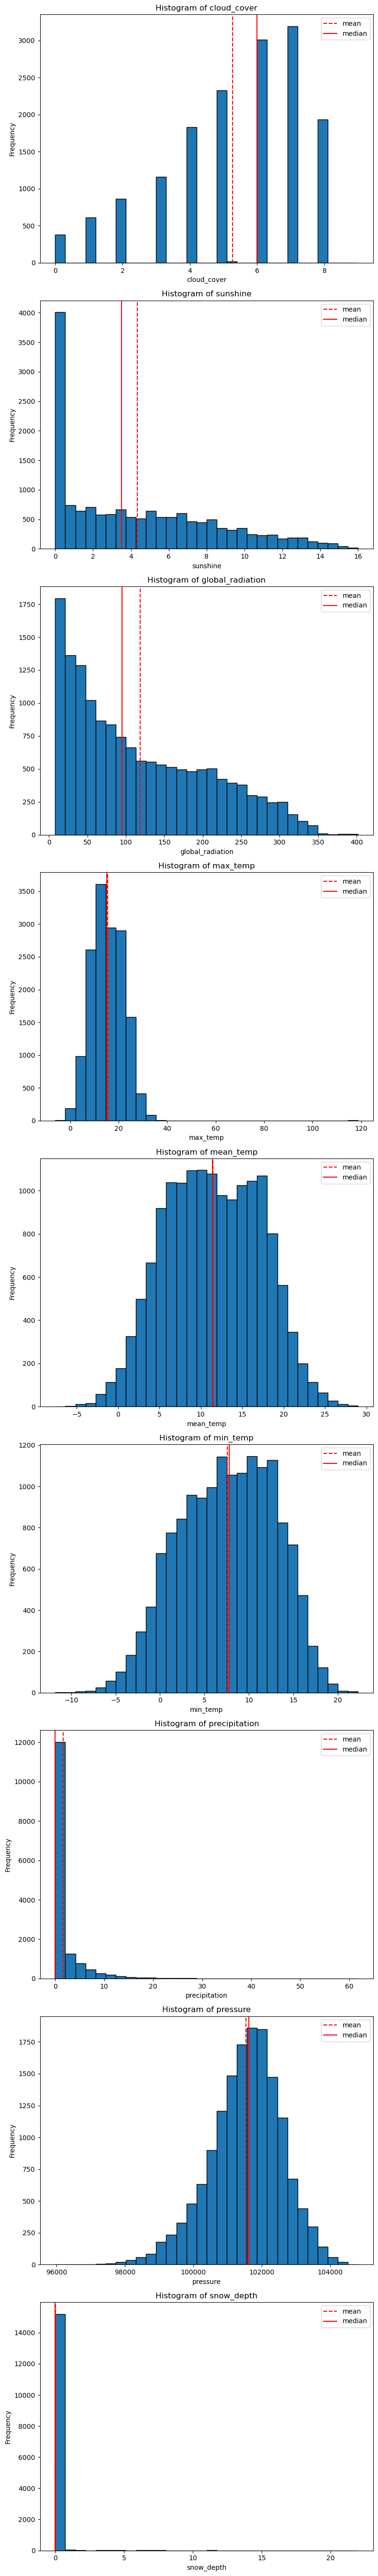

In [32]:
# Selecting numerical columns for visualization
numerical_columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Plotting histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    plt.hist(lw_df[column].dropna(), bins=30, edgecolor='black')
    plt.axvline(lw_df[column].mean(), label='mean', color='red', linestyle='--')
    plt.axvline(lw_df[column].median(), label='median', color='red')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

#### A visual of how the average values of each weather variable changes over the months from years 1979 to 2021.

We have to understand how the different months impact the dataset. We'll need to extract and create new columns `year` and `month` out of `date`. Then drop `date`.  

In [33]:
# Creating a new dataframe out of the original dataframe
lw_df2 = lw_df.copy()

In [34]:
# Dropping the column date
lw_df2 = lw_df.drop('date', axis=1)

In [35]:
# Extract month and year 
lw_df2['year'] = lw_df['date'].dt.year
lw_df2['month'] = lw_df['date'].dt.month

In [36]:
lw_df2

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.000000,1979,1
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.000000,1979,1
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.000000,1979,1
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.000000,1979,1
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.000000,1979,1
...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.037986,2020,12
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.037986,2020,12
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.037986,2020,12
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.037986,2020,12


### Visualising the weather variables 

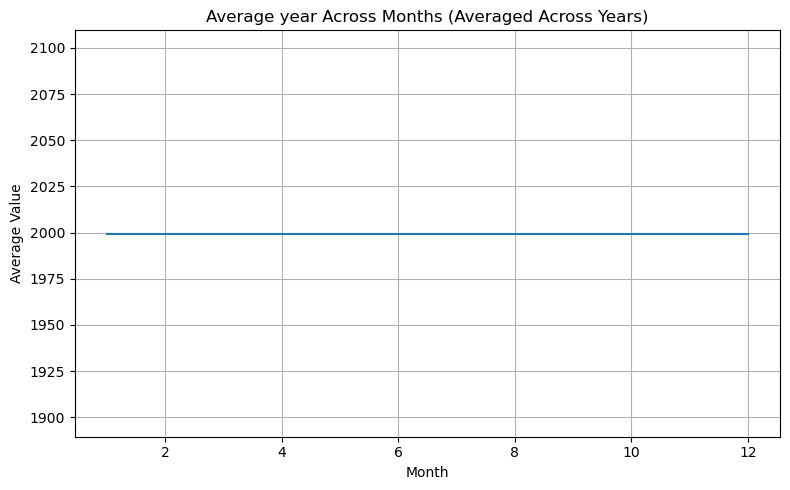

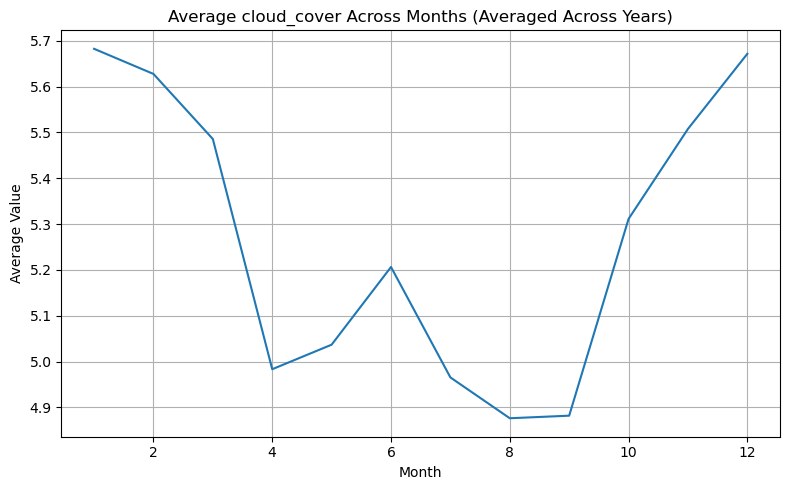

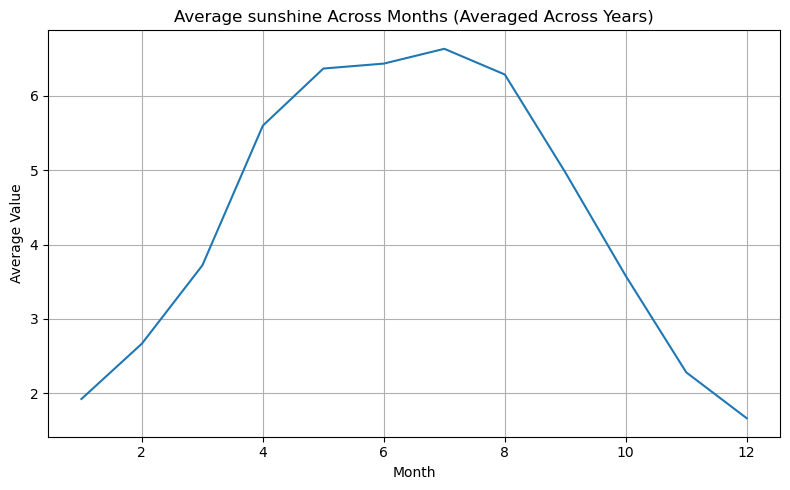

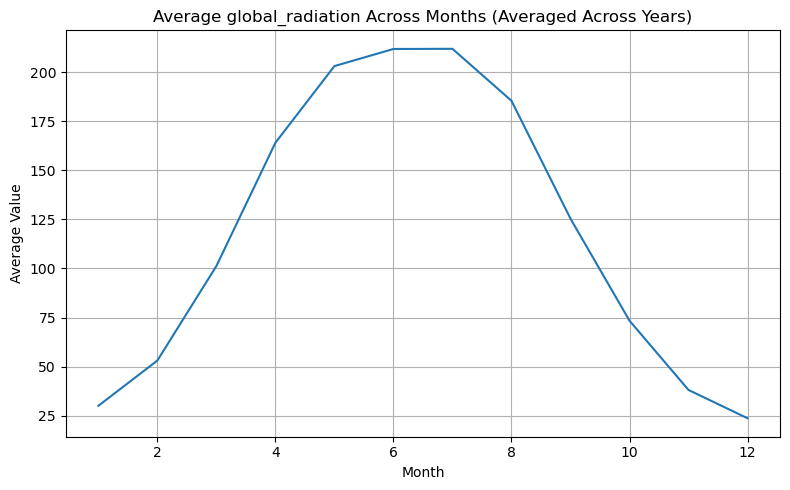

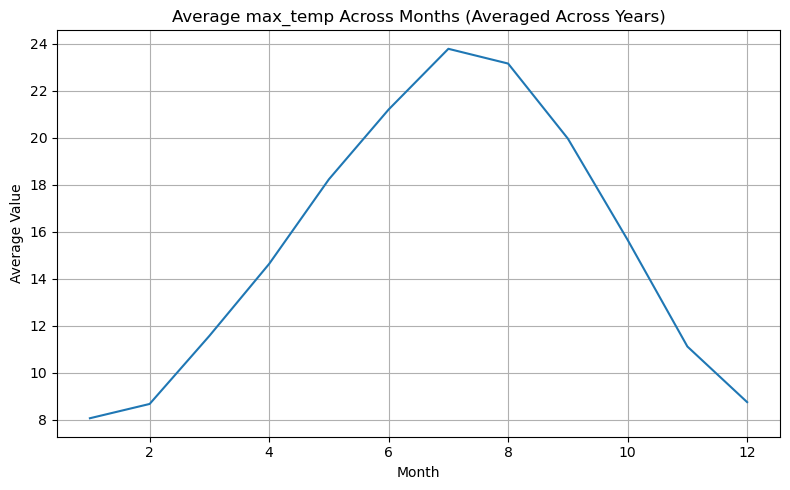

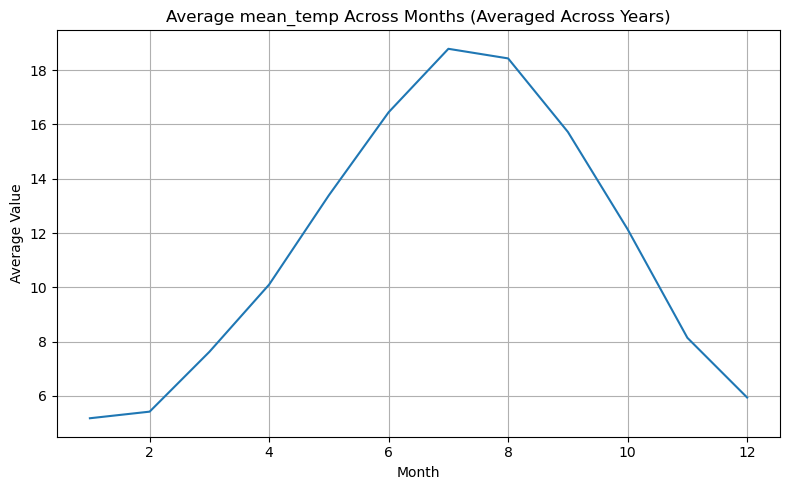

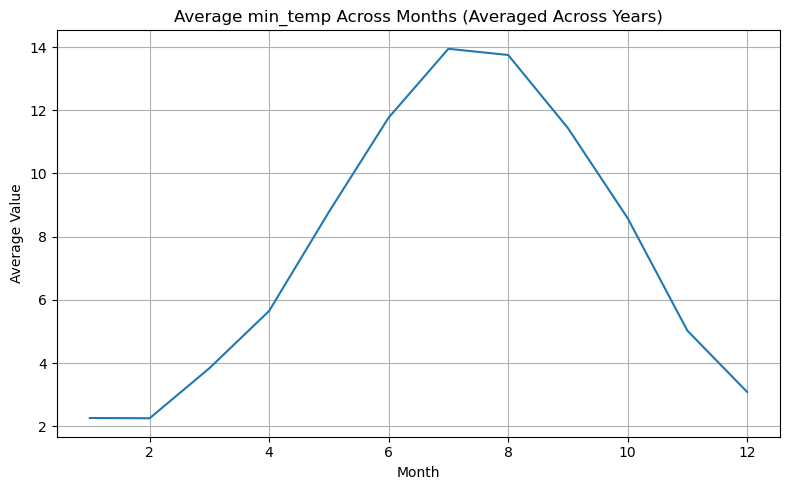

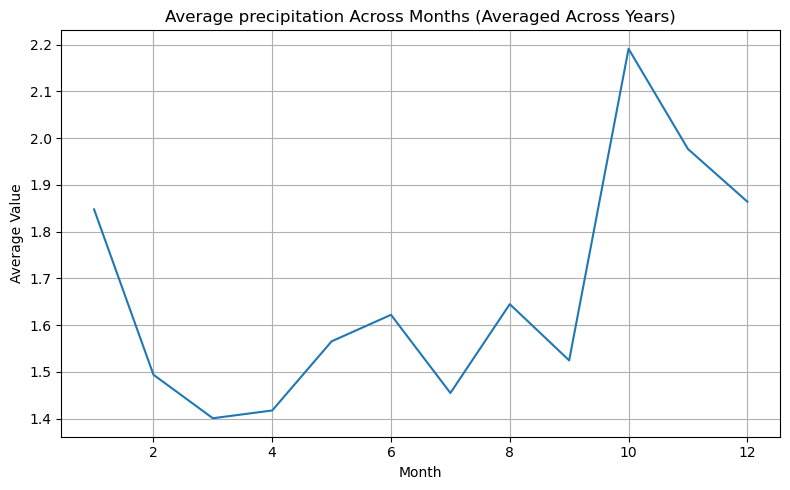

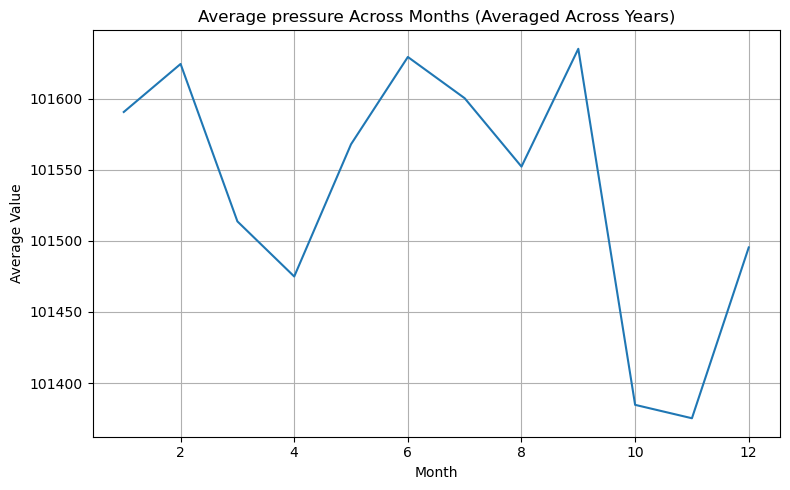

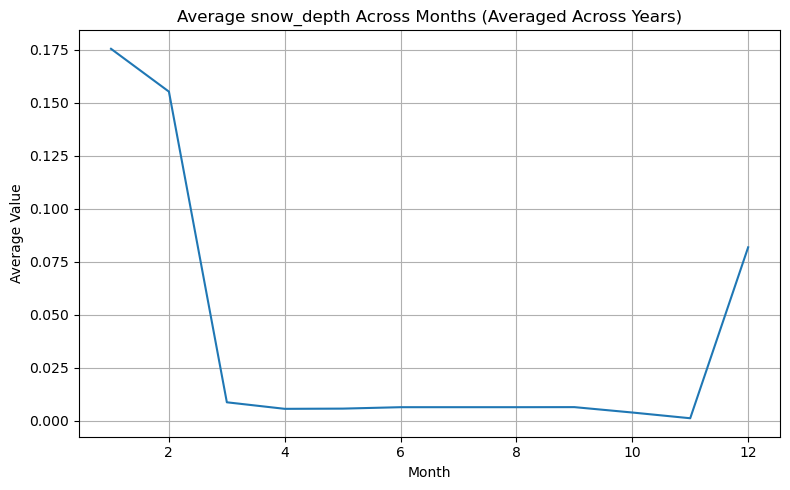

In [37]:
# Group by year and month, then calculate the mean for each month across years
average_weather_monthly = lw_df2.groupby(['year', 'month']).mean().reset_index()

# Calculate the average across years for each month
average_across_years = average_weather_monthly.groupby('month').mean()

# Exclude the 'date' column if it exists
if 'date' in average_across_years.columns:
    average_across_years = average_across_years.drop(columns=['date'])
    
# Plot each weather variable on separate graphs
for column in average_across_years.columns:
    plt.figure(figsize=(8, 5))
    plt.plot(average_across_years.index, average_across_years[column])
    plt.title(f'Average {column} Across Months (Averaged Across Years)')
    plt.xlabel('Month')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Correlations for the different weather variables

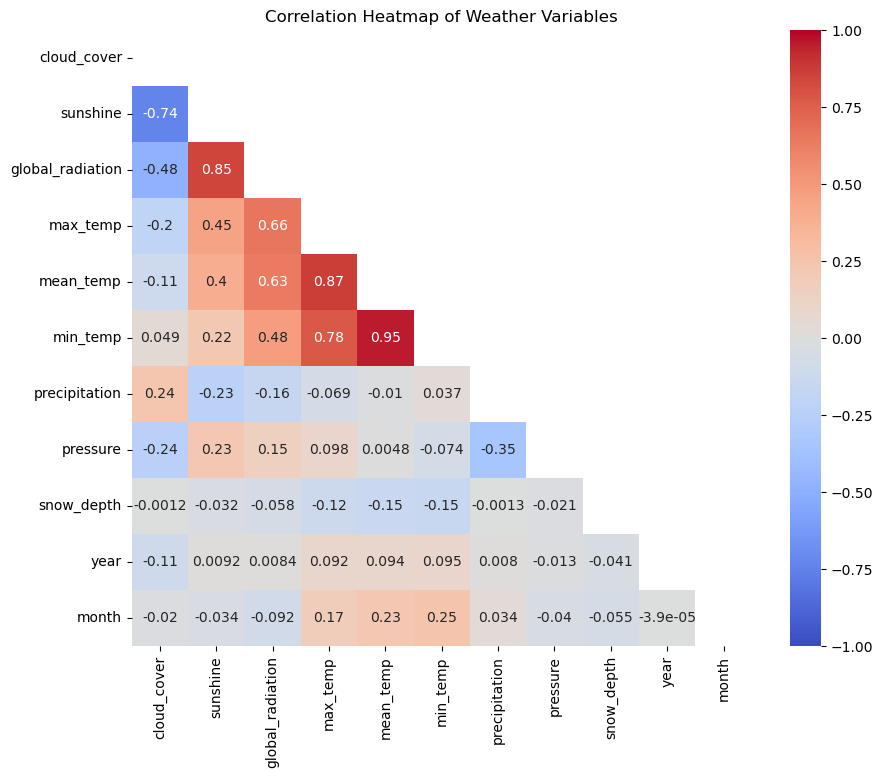

In [38]:
# Selecting weather variables for correlation analysis
weather_variables = lw_df2.columns

# Calculating correlation matrix
correlation_matrix = lw_df2[weather_variables].corr()

# Mask for the upper triangle
mask = ~np.tri(correlation_matrix.shape[0], k=-1, dtype=bool)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

Strongest correlations in this dataset seem to be the mean temp and min temp (0.95). 
Variations or fluctuations in the minimum temperature have a more immediate and direct effect on the average temperature compared to variations in the maximum temperature.

While those are positive linear correlations, a negative linear correlation to make note of would be the cloud cover and sunshine (-0.74)

Some interesting correlations to also be aware of would be between:
- Precipitation & Min temp
- Snow depth & cloud cover
- Pressure & Mean temp
- Precipiation & Snow depth

All of which provide a value extremely close to (0.00/-0.00) indicating they have no relationship with one another. 


### Checking the outliers

In [39]:
lw_df2.columns.size

11

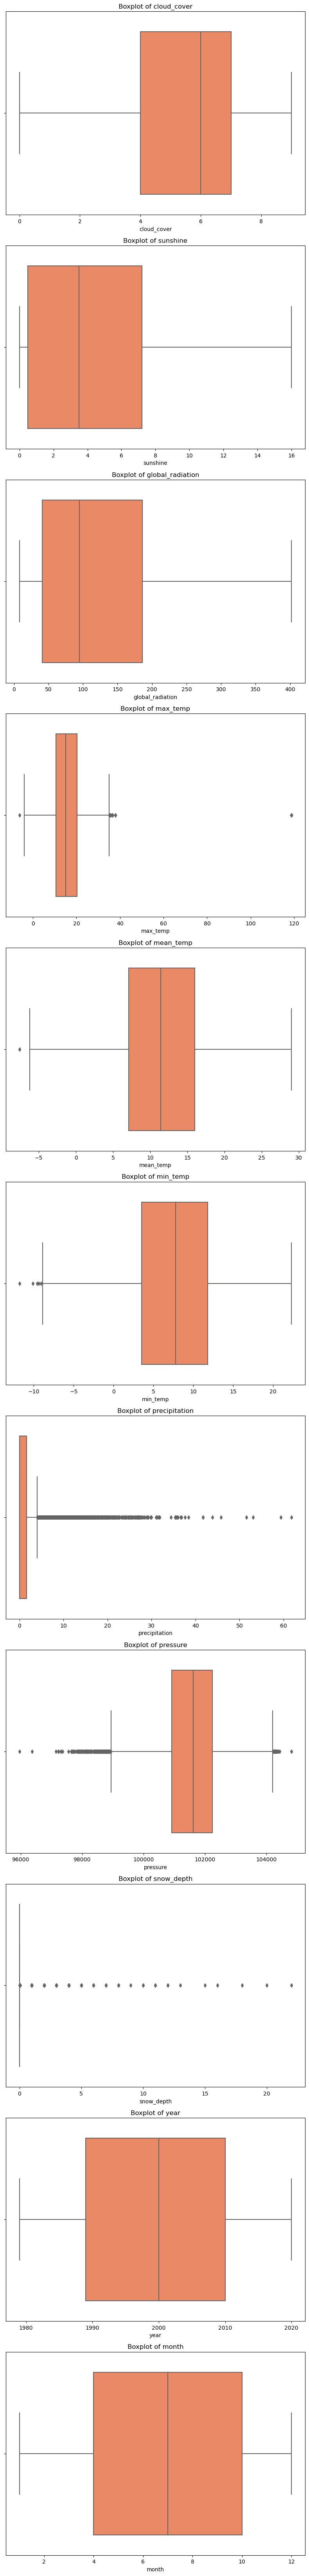

In [40]:
# Creating separate boxplots for each weather variable

fig, axes = plt.subplots(nrows=lw_df2.columns.size, ncols=1, figsize=(8, 6 * lw_df2.columns.size))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(lw_df2.columns):
    ax = axes[i]
    sns.boxplot(x=lw_df2[variable], ax=ax, color='coral', showfliers=True)
    ax.set_title(f'Boxplot of {variable}')
    ax.set_xlabel(variable)

plt.tight_layout()
plt.show()

To keep note:

Most of the variables do not show case a normal distribution and either left/right skewed. 

`max_temp` has a value that comes close to 120 degrees. This is probably an error in either the instrument/the collection of the data, and should most likely be viewed as such. 

Other outliers like this may be in the dataset and might have an impact at a later stage.

## 2. Run a Linear regression model on `mean_temp`

There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**


### Linearity

### Visualising the different variables with respect to `mean_temp`

In [41]:
# importing this package to fit and explore our linear regression model
import statsmodels.api as sm

In [42]:
weather_variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth', 'year', 'month']
# Independent variables
X = lw_df2[weather_variables]

# Dependent variable
y = lw_df2['mean_temp']

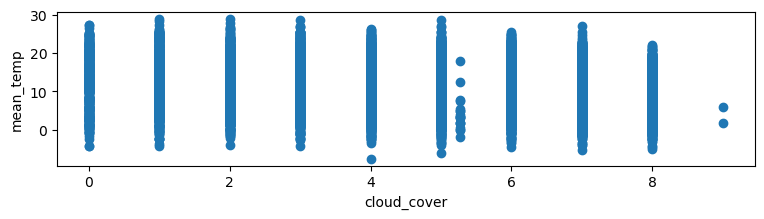

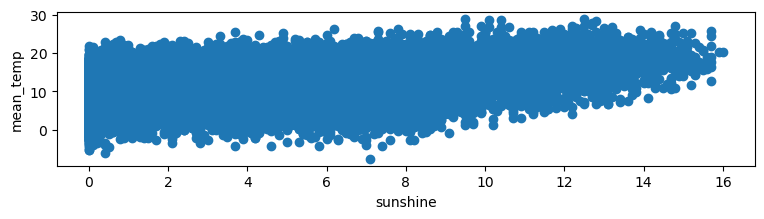

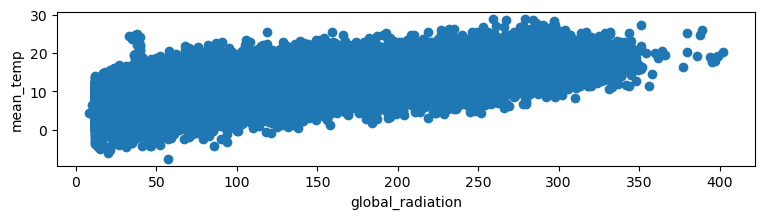

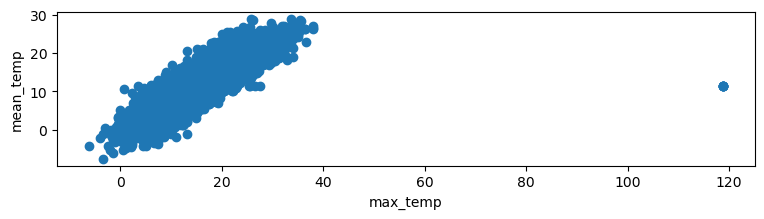

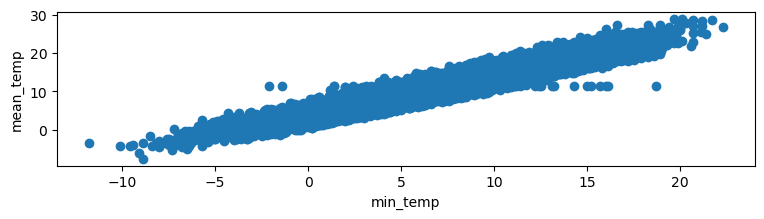

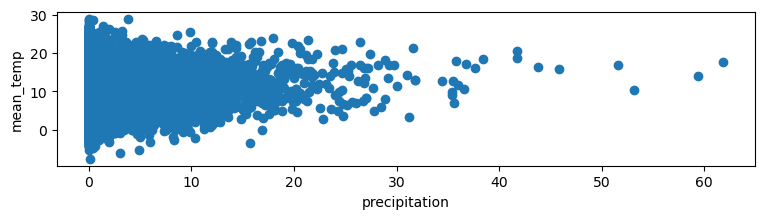

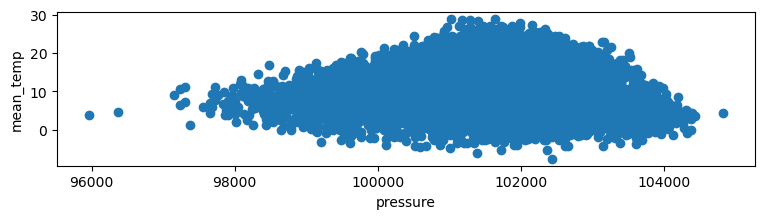

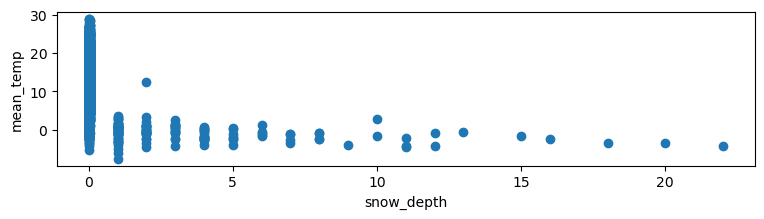

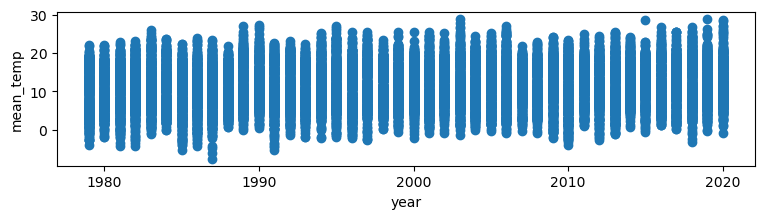

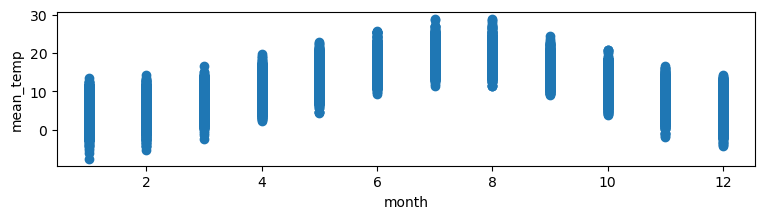

In [43]:
# Using a loop to make 10 plots 
for col in X.columns: 
    plt.figure(figsize=(9, 2))
    plt.scatter(X[col], y)
    plt.ylabel('mean_temp')
    plt.xlabel(col)
    plt.show()

Based on the above graphs, the following variables showcase linearity with `mean_temp`:
- `sunshine`, `global_radiation`, `max_temp`, `min_temp`.
- One could say that `snow_depth` has a negative linear relationship 

The following variables don't showcase linearity with `mean_temp`:
- `cloud_cover`, `precipitation`, `pressure`, `year`, `month`
- `pressure` looks as though it is clustering


### Addressing multicollinearity using VIF (Variance Inflation Factor)

In [44]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X

X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

cloud_cover         2.831709
sunshine            7.957669
global_radiation    7.269884
max_temp            3.716717
min_temp            3.224457
precipitation       1.178784
pressure            1.215837
snow_depth          1.026020
year                1.055011
month               1.250222
dtype: float64

To summarize:
- `sunshine` and `global_radiation` exhibit the highest multicollinearity among the variables.
- `cloud_cover`, `max_temp`, and `min_temp` show moderate levels of correlation with other predictors.
- `precipitation`, `pressure`, `snow_depth`, `year` and `month` have relatively lower levels of multicollinearity among the variables in the model.

### Correlations of all variables with respect to `mean_temp`

In [45]:
cal_corr = lw_df2.corr()
cal_corr['mean_temp'].sort_values()

snow_depth         -0.147051
cloud_cover        -0.110273
precipitation      -0.010455
pressure            0.004758
year                0.093647
month               0.226806
sunshine            0.396130
global_radiation    0.633862
max_temp            0.870106
min_temp            0.954532
mean_temp           1.000000
Name: mean_temp, dtype: float64

To summarize:
- `mean_temp` is strongly positively correlated with `min_temp`, `max_temp`, `global_radiation`, and moderately with `sunshine`. This suggests that as `mean_temp` increases, these variables tend to increase as well.
- The weak correlations with `pressure`, `precipitation`, `cloud_cover`, and `snow_depth` indicate a lack of strong linear relationship with `mean_temp`. Additionally, the latter three, show a negative relationship indicating  that as `mean_temp` rises, they will decrease. 

### Model Iterations

### Model 1

Let's try the model with all the variables

In [46]:
# add constant
X_withconstant_1 = sm.add_constant(X)

In [47]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant_1)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -22307.
No. Observations:               15341   AIC:                         4.464e+04
Df Residuals:                   15330   BIC:                         4.472e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.7255      1.699     -3.960      0.000     -10.055      -3.396
cloud_cover         -0.0850      0.007    -12.488      0.000      -0.098      -0.072
sunshine             0.0326      0.006      5.564      0.000       0.021       0.044
global_radiation     0.0075      0.000     29.458      0.000       0.007       0.008
max_temp             0.1689      0.002     71.883      0.000       0.164       0.173
min_temp             0.7882      0.003    279.487      0.000       0.783       0.794
precipitation        0.0184      0.002      7.588      0.000       0.014       0.023
pressure          7.763e-05   8.79e-06      8.833      0.000    6.04e-05    9.49e-05
snow_depth          -0.0464      0.016     -2.842      0.004      -0.078      -0.014
year                 0.0005      0.001      0.672      0.502      -0.001       0.002
month                0.0292      0.003     10.759      0.000       0.024       0.034
==============================================================================
Omnibus:                    13149.662   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4197602.552
Skew:                          -3.231   Prob(JB):                         0.00
Kurtosis:                      83.778   Cond. No.                     2.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values, we can gather that all variables are siginificant in predicting `mean_temp` except for `year`. However, some of these variables provide a strong multicollineraity, hence we'd need to drop some to help improve our model.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.967 |

### Model 2

Due to it being highly colinear, let's try it without `sunshine`. Additionally, we can remove `year` due to its insignificance based on the previous model. 

In [48]:
# drop columns 
X_new = X.drop(columns=['sunshine', 'year'])

In [49]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression2 = sm.OLS(y, X_new)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results2 = myregression2.fit()

# Looking at the summary
myregression_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 5.647e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -22323.
No. Observations:               15341   AIC:                         4.466e+04
Df Residuals:                   15332   BIC:                         4.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.8775      0.895     -6.569      0.000      -7.631      -4.124
cloud_cover         -0.1092      0.005    -21.024      0.000      -0.119      -0.099
global_radiation     0.0086      0.000     56.073      0.000       0.008       0.009
max_temp             0.1673      0.002     71.819      0.000       0.163       0.172
min_temp             0.7866      0.003    281.497      0.000       0.781       0.792
precipitation        0.0178      0.002      7.337      0.000       0.013       0.023
pressure          8.024e-05   8.78e-06      9.138      0.000     6.3e-05    9.75e-05
snow_depth          -0.0481      0.016     -2.950      0.003      -0.080      -0.016
month                0.0315      0.003     11.775      0.000       0.026       0.037
==============================================================================
Omnibus:                    12975.773   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4033311.372
Skew:                          -3.162   Prob(JB):                         0.00
Kurtosis:                      82.183   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The removal of `sunshine` & `year`, doesn't seem to have solved our issue with multicollinearity. Perahps we should try removing `global_radiation` as well. 

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                 | 0.967 |
| 2 | All minus sunshine and year                         | 0.967 |

### Model 3

In [50]:
X_ammend = X.drop(columns=['year', 'global_radiation', 'sunshine'])

In [51]:
X_ammend 

,const,cloud_cover,max_temp,min_temp,precipitation,pressure,snow_depth,month
0,1.0,2.0,2.3,-7.5,0.4,101900.0,9.000000,1
1,1.0,6.0,1.6,-7.5,0.0,102530.0,8.000000,1
2,1.0,5.0,1.3,-7.2,0.0,102050.0,4.000000,1
3,1.0,8.0,-0.3,-6.5,0.0,100840.0,2.000000,1
4,1.0,6.0,5.6,-1.4,0.0,102250.0,1.000000,1
...,...,...,...,...,...,...,...,...
15336,1.0,1.0,7.5,7.6,2.0,98000.0,0.037986,12
15337,1.0,7.0,3.6,-1.3,0.2,97370.0,0.037986,12
15338,1.0,7.0,4.1,1.1,0.0,98830.0,0.037986,12
15339,1.0,6.0,5.6,-0.1,0.0,100200.0,0.037986,12


In [52]:
X_withconstant_3 = sm.add_constant(X_ammend)

In [53]:
# add constant
X_withconstant_3 = sm.add_constant(X_ammend)
# run model again
# 1. Instantiate Model
myregression3 = sm.OLS(y, X_withconstant_3)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results3 = myregression3.fit()

# Looking at the summary
myregression_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 5.319e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -23753.
No. Observations:               15341   AIC:                         4.752e+04
Df Residuals:                   15333   BIC:                         4.758e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.8697      0.982     -4.959      0.000      -6.795      -2.945
cloud_cover      -0.2546      0.005    -51.532      0.000      -0.264      -0.245
max_temp          0.2198      0.002     93.942      0.000       0.215       0.224
min_temp          0.8139      0.003    269.456      0.000       0.808       0.820
precipitation     0.0105      0.003      3.940      0.000       0.005       0.016
pressure       8.125e-05   9.64e-06      8.429      0.000    6.24e-05       0.000
snow_depth       -0.0287      0.018     -1.601      0.109      -0.064       0.006
month            -0.0191      0.003     -6.921      0.000      -0.025      -0.014
==============================================================================
Omnibus:                    16127.438   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8625995.160
Skew:                          -4.528   Prob(JB):                         0.00
Kurtosis:                     118.814   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see `snow_depth` has become insignificant due to its high p-value. Additionally, the $R$2 has decreased slightly. Multicollinearity still hasn't been resolved. We should remove `snow_depth`. 

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                     | 0.967 |
| 2 | All minus sunshine, year                                | 0.967 |
| 3 | All minus year, global_radiation, sunshine              | 0.960 |

### Model 4

In [54]:
X_ammend_two = X.drop(columns=['year', 'global_radiation', 'sunshine', 'snow_depth'])

In [55]:
# add constant
X_withconstant_4 = sm.add_constant(X_ammend_two)
# run model again
# 1. Instantiate Model
myregression4 = sm.OLS(y, X_withconstant_4)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results4 = myregression4.fit()

# Looking at the summary
myregression_results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 6.204e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -23755.
No. Observations:               15341   AIC:                         4.752e+04
Df Residuals:                   15334   BIC:                         4.758e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.9259      0.981     -5.019      0.000      -6.850      -3.002
cloud_cover      -0.2546      0.005    -51.531      0.000      -0.264      -0.245
max_temp          0.2198      0.002     93.930      0.000       0.215       0.224
min_temp          0.8144      0.003    270.661      0.000       0.808       0.820
precipitation     0.0105      0.003      3.950      0.000       0.005       0.016
pressure       8.176e-05   9.63e-06      8.486      0.000    6.29e-05       0.000
month            -0.0190      0.003     -6.892      0.000      -0.024      -0.014
==============================================================================
Omnibus:                    16126.856   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8622241.891
Skew:                          -4.528   Prob(JB):                         0.00
Kurtosis:                     118.788   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the graphs seen earlier, we've seen `pressure` to hold no linear relationship to `mean_temp`.Perhaps we can remove it to see if it helps in addressing multicollinearity.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus sunshine, year                                                      | 0.967 |
| 3 | All minus year, global_radiation, sunshine                                    | 0.960 |
| 4 | All minus year, global_radiation, sunshine, snow_depth                        | 0.960 |

### Model 5

In [56]:
X_ammend_three = X.drop(columns=['sunshine', 'global_radiation', 'year', 'snow_depth', 'pressure'])

In [57]:
X_ammend_three

,const,cloud_cover,max_temp,min_temp,precipitation,month
0,1.0,2.0,2.3,-7.5,0.4,1
1,1.0,6.0,1.6,-7.5,0.0,1
2,1.0,5.0,1.3,-7.2,0.0,1
3,1.0,8.0,-0.3,-6.5,0.0,1
4,1.0,6.0,5.6,-1.4,0.0,1
...,...,...,...,...,...,...
15336,1.0,1.0,7.5,7.6,2.0,12
15337,1.0,7.0,3.6,-1.3,0.2,12
15338,1.0,7.0,4.1,1.1,0.0,12
15339,1.0,6.0,5.6,-0.1,0.0,12


In [58]:
# add constant
X_withconstant_5 = sm.add_constant(X_ammend_three)
# run model again
# 1. Instantiate Model
myregression5 = sm.OLS(y, X_withconstant_5)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results5 = myregression5.fit()

# Looking at the summary
myregression_results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 7.410e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -23791.
No. Observations:               15341   AIC:                         4.759e+04
Df Residuals:                   15335   BIC:                         4.764e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3946      0.043     79.515      0.000       3.311       3.478
cloud_cover      -0.2591      0.005    -52.632      0.000      -0.269      -0.249
max_temp          0.2230      0.002     96.268      0.000       0.218       0.227
min_temp          0.8103      0.003    272.110      0.000       0.804       0.816
precipitation     0.0037      0.003      1.458      0.145      -0.001       0.009
month            -0.0193      0.003     -6.990      0.000      -0.025      -0.014
==============================================================================
Omnibus:                    16384.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9202523.972
Skew:                          -4.651   Prob(JB):                         0.00
Kurtosis:                     122.625   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This seems to have resolved our multicollinearity issue. Perhaps we should remove the other non-linear variables to see if it improves our model. Additionally, we should remove `precipitation` as its p-value indicates it doesn't hold significance.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus sunshine, year                                                      | 0.967 |
| 3 | All minus year, global_radiation, sunshine                                    | 0.960 |
| 4 | All minus year, global_radiation, sunshine, snow_depth                        | 0.960 |
| 5 | All minus year, global_radiation, sunshine, snow_depth, pressure              | 0.960 |

### Model 6

In [59]:
X_ammend_four = X.drop(columns=['sunshine', 'global_radiation', 'year', 'snow_depth', 'pressure', 'precipitation', 'cloud_cover', 'month'])

In [60]:
X_ammend_four

,const,max_temp,min_temp
0,1.0,2.3,-7.5
1,1.0,1.6,-7.5
2,1.0,1.3,-7.2
3,1.0,-0.3,-6.5
4,1.0,5.6,-1.4
...,...,...,...
15336,1.0,7.5,7.6
15337,1.0,3.6,-1.3
15338,1.0,4.1,1.1
15339,1.0,5.6,-0.1


In [61]:
# add constant
X_withconstant_6 = sm.add_constant(X_ammend_four)
# run model again
# 1. Instantiate Model
myregression6 = sm.OLS(y, X_withconstant_6)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results6 = myregression6.fit()

# Looking at the summary
myregression_results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.549e+05
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:39:45   Log-Likelihood:                -25105.
No. Observations:               15341   AIC:                         5.022e+04
Df Residuals:                   15338   BIC:                         5.024e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5972      0.025     63.298      0.000       1.548       1.647
max_temp       0.2703      0.002    116.430      0.000       0.266       0.275
min_temp       0.7549      0.003    252.272      0.000       0.749       0.761
==============================================================================
Omnibus:                    18491.937   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15091050.547
Skew:                          -5.752   Prob(JB):                         0.00
Kurtosis:                     156.221   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based off this model now, we can say that `max_temp` & `min_temp` to predict `mean_temp`. 

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus sunshine, year                                                      | 0.967 |
| 3 | All minus year, global_radiation, sunshine                                    | 0.960 |
| 4 | All minus year, global_radiation, sunshine, snow_depth                        | 0.960 |
| 5 | All minus year, global_radiation, sunshine, snow_depth, pressure              | 0.960 |
| 6 | max_temp, min_temp                                                            | 0.953 |

After trying differnt combinations of variable one by one, we were able to achieve $R^2$ of 0.953. This includes only 2 independent variables out of 10 and because of that provides the easiest interpretability. This model has the best performance ($R^2$) while not having strong multicollinearity affecting it. Therefore, we can conclude this is our best fitting model.

### Residuals

### Visual representation of the residuals of various models 

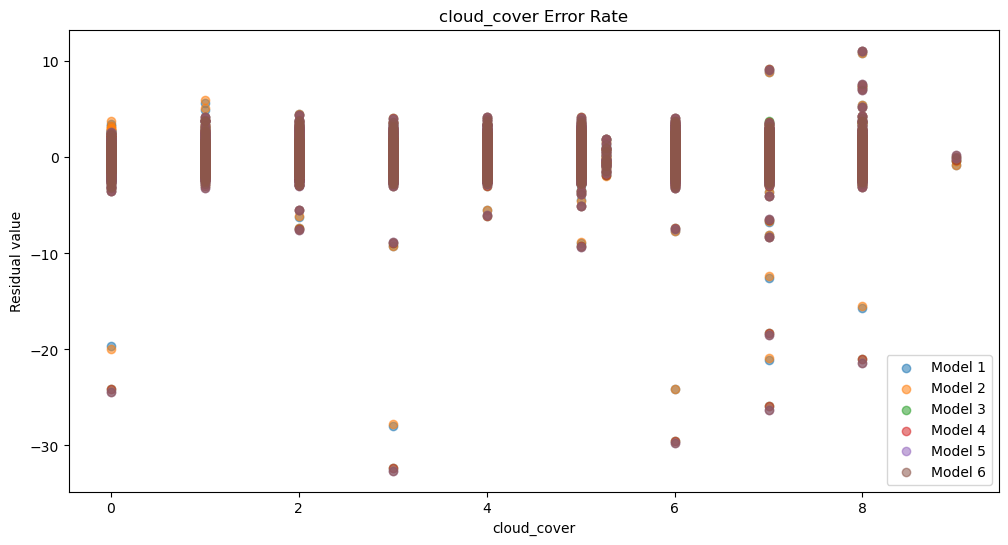

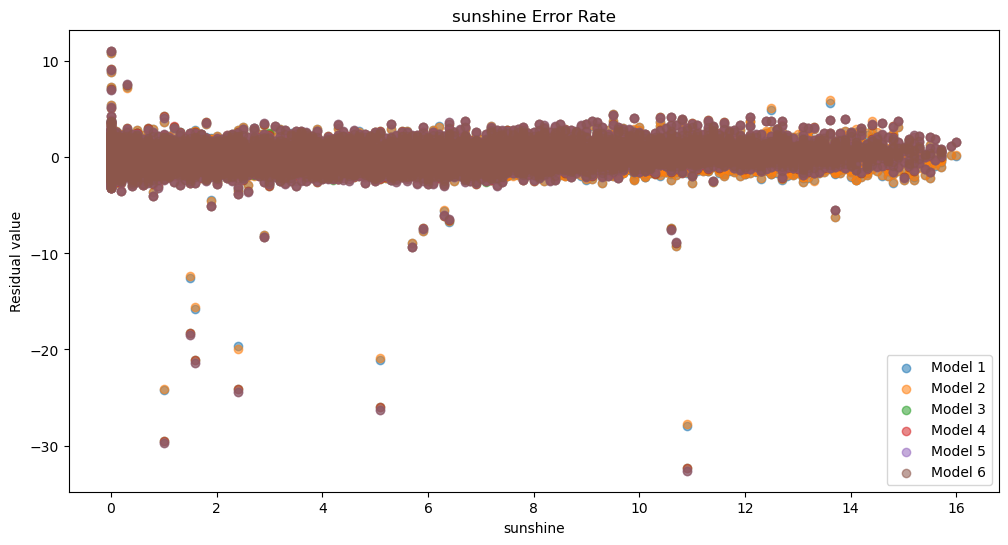

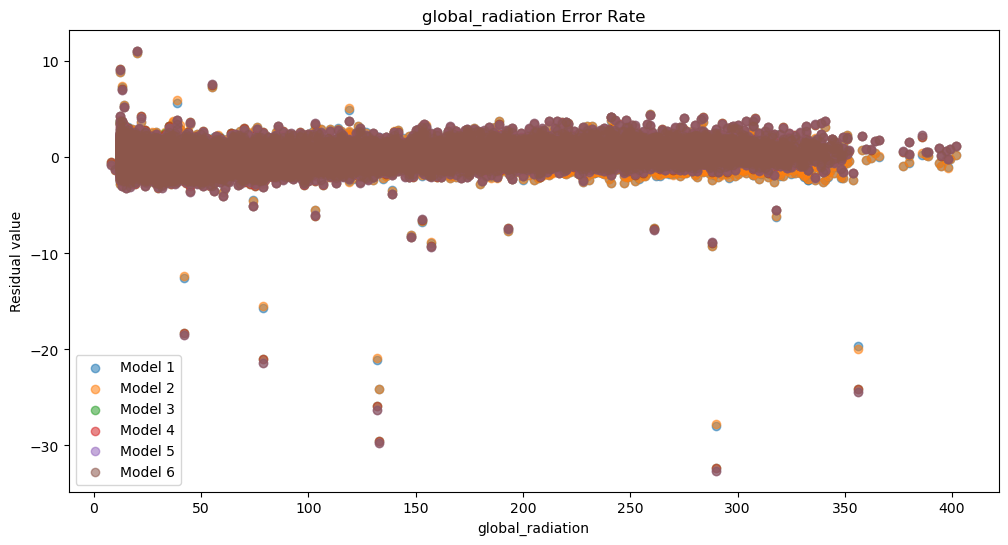

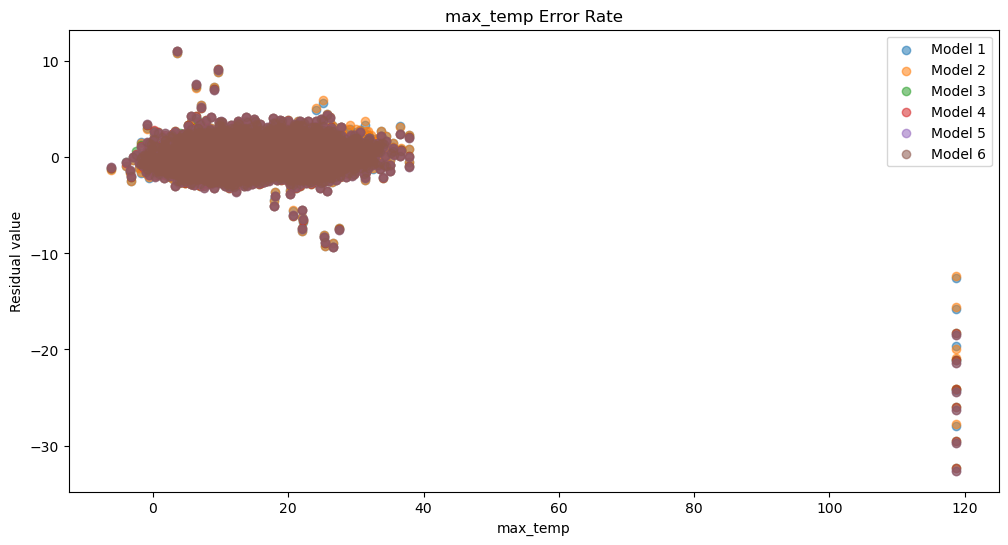

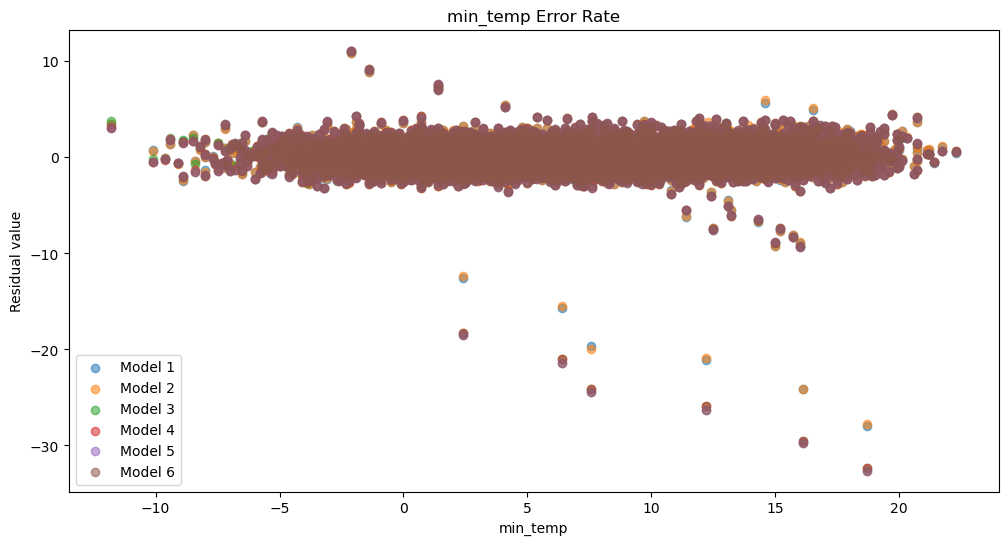

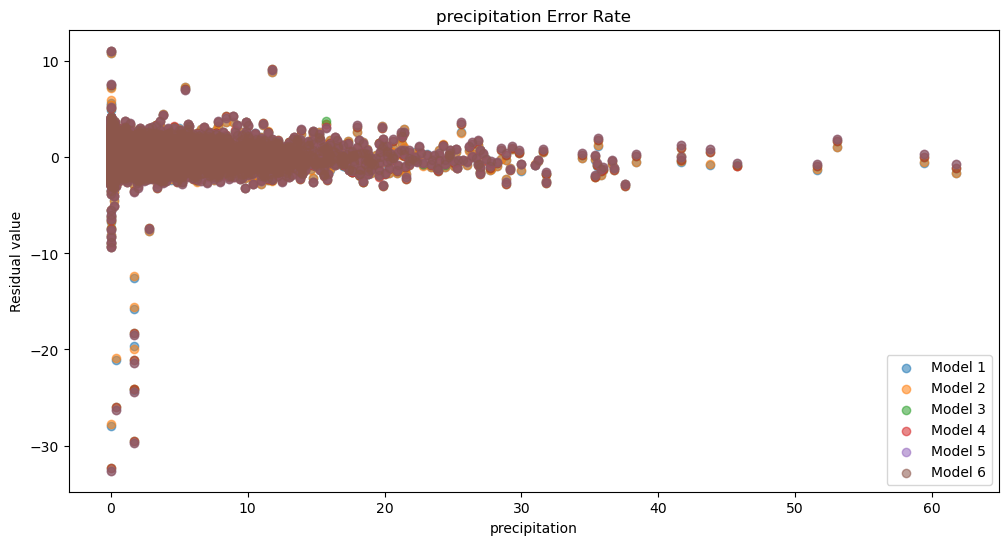

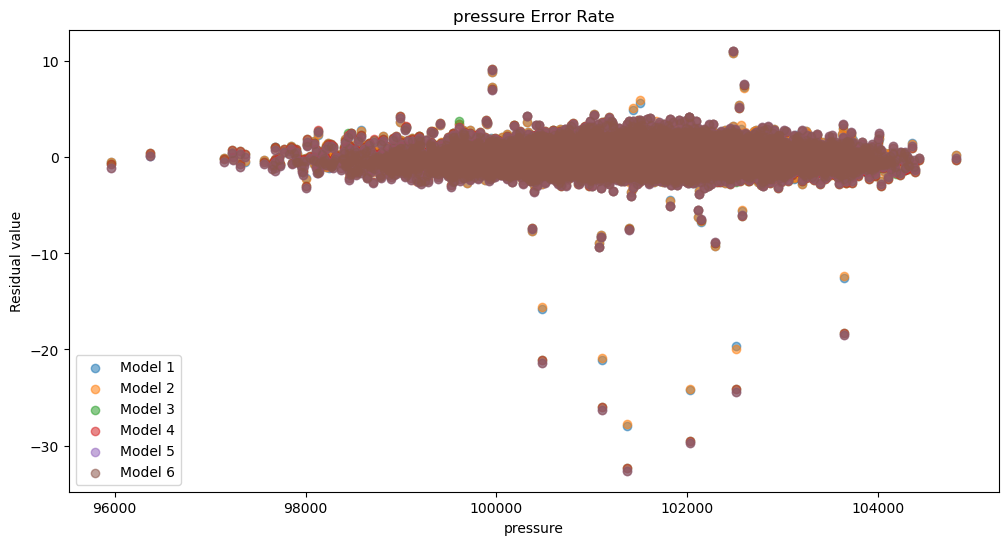

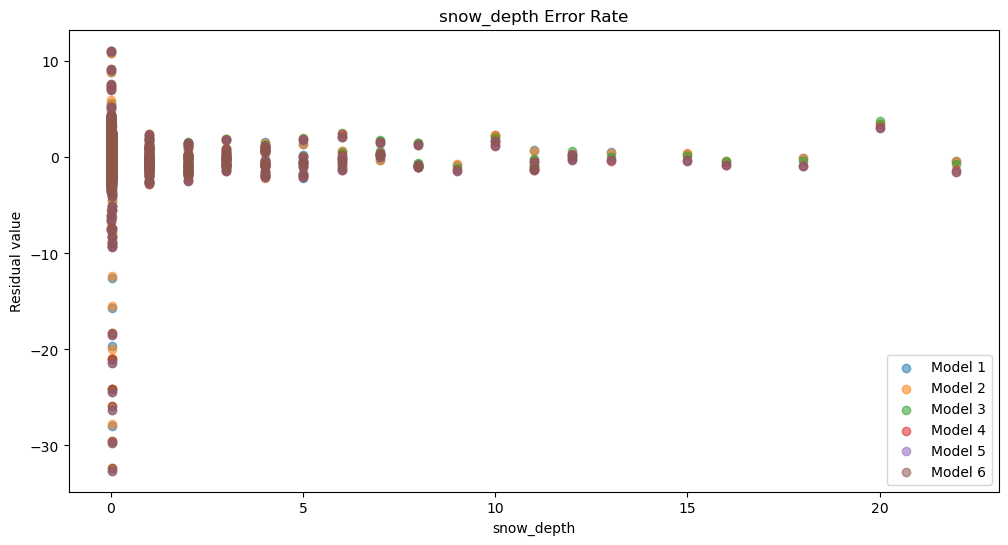

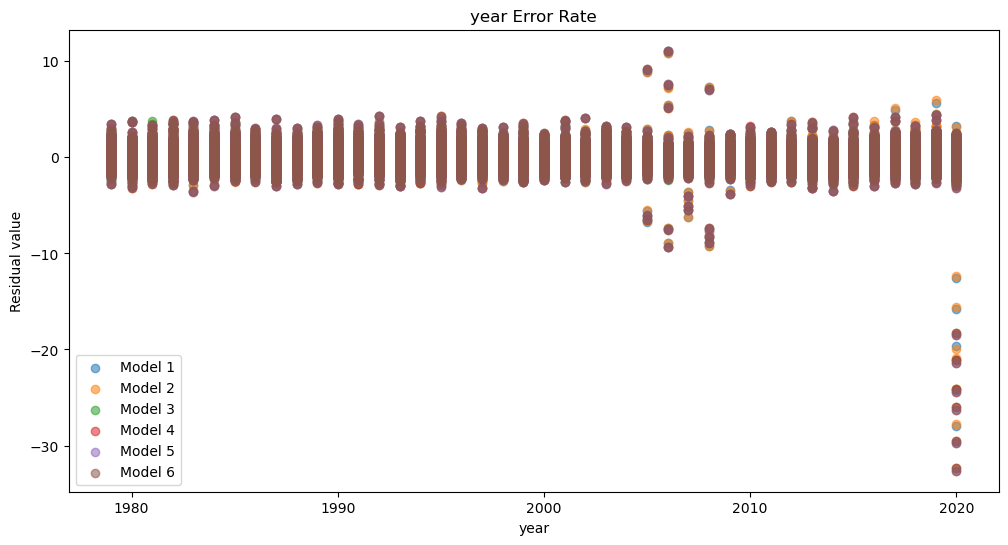

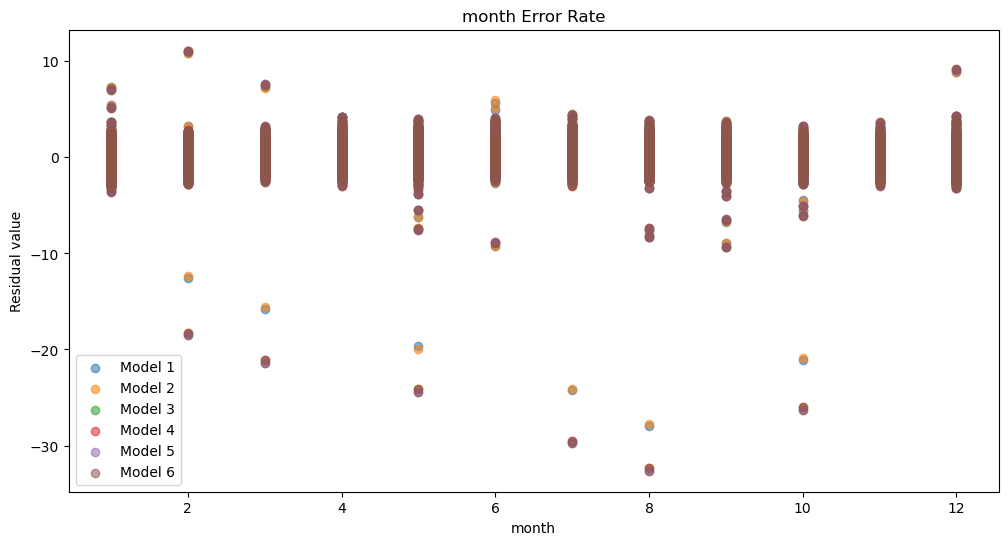

In [62]:
for column in X.columns[1:]:
    plt.figure(figsize = (12,6))
    plt.scatter(X[column], myregression_results.resid,label="Model 1", alpha=0.55)
    plt.scatter(X[column], myregression_results2.resid,label="Model 2", alpha=0.55)
    plt.scatter(X[column], myregression_results3.resid,label="Model 3", alpha=0.55)
    plt.scatter(X[column], myregression_results4.resid,label="Model 4", alpha=0.55)
    plt.scatter(X[column], myregression_results5.resid,label="Model 5", alpha=0.55)
    plt.scatter(X[column], myregression_results5.resid,label="Model 6", alpha=0.55)
    plt.xlabel(f"{column}")
    plt.ylabel("Residual value")
    plt.legend()
    plt.title(f"{column}" + " Error Rate")
    plt.show()

In the context of the regression analysis, the residuals above showcase the difference between the observed value of the dependent variable, `mean_temp`, and the values predicted by the regression model.This difference is what we are referring to as "Error". 
A positive residual indicates that the actual observed value is higher than the predicted value, while a negative residual means the observed value is lower than predicted.

The models seem to do a decent job in predicting values as the majority of points tend to hover around/close to a residual value of 0. However, there is a decent number of outliers evident, especially the negative values, ranging as far as -30. This seems to indicate the model overestimates some values by a fair margin. Model 6 seems to show a high overfit regarding outliers based on the usuage of only two variables.
*Look at accuracy*

Heteroscedasticity is pretty evident in `cloud_cover`, `snow_depth`, `year`& `month`. While not as prominent, the other variables also show a little spread/variance in their predictions. We may need to address these outliers at a later stage in terms of cleaning. In general all plots show a spread of values in predicting outliers. An example of such an outlier can be seen in `max_temp` with a point nearing a value of 120.

### Shapiro-Wilk Test for all models

In [63]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro-Wilk Test for Model {idx}: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

Shapiro-Wilk Test for Model 1: Statistic=0.8661566972732544, p-value=0.0
Shapiro-Wilk Test for Model 2: Statistic=0.8671669960021973, p-value=0.0
Shapiro-Wilk Test for Model 3: Statistic=0.837061882019043, p-value=0.0
Shapiro-Wilk Test for Model 4: Statistic=0.8371309041976929, p-value=0.0
Shapiro-Wilk Test for Model 5: Statistic=0.8340305685997009, p-value=0.0
Shapiro-Wilk Test for Model 6: Statistic=0.8072469234466553, p-value=0.0


C:\Users\mitth\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test statistic measures how closely the residuals in each model's dataset resemble a normal distribution. The values range between 0 and 1, where values closer to 1 indicate the data is more normally distributed.

The p-value indicates the strength of evidence against the null hypothesis (the assumption of normality). A smaller p-value (typically below a significance level like 0.05) suggests stronger evidence to reject the null hypothesis in favor of the alternative hypothesis, indicating departure from normality.

$$ H_0 : \text{Data is normally distributed}  \quad vs. \quad H_1 : \text{Data is not normally distributed} $$

The above Shapiro-Wilk test indicates that all 6 models reject the null hypothesis. This makes sense as we've seen earlier that there were many variables within the dataset that weren't normally distributed.

### Q-Q plots

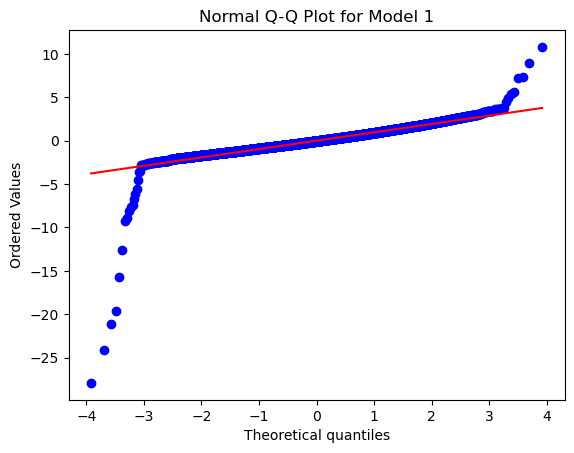

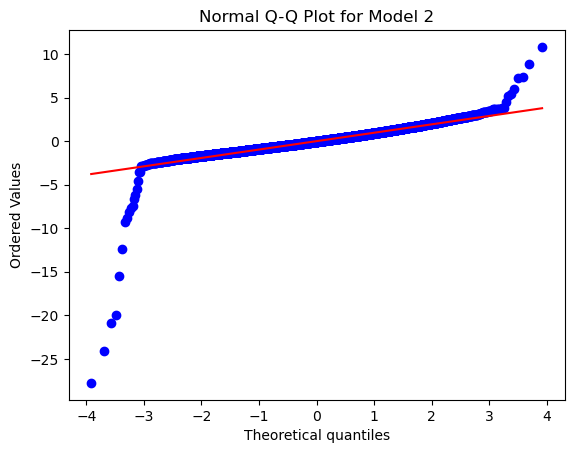

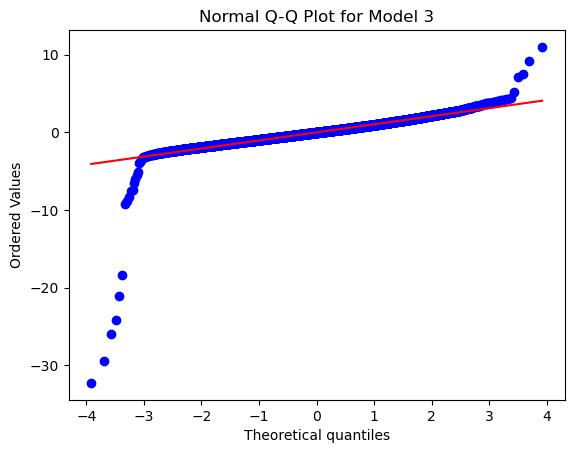

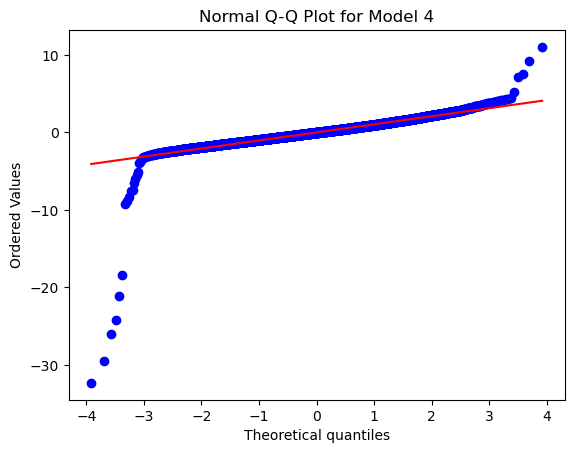

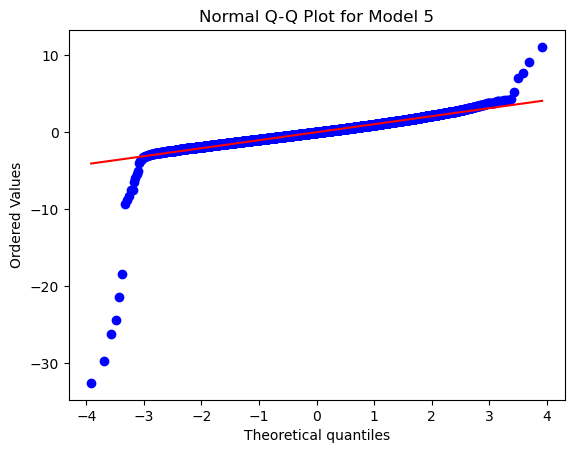

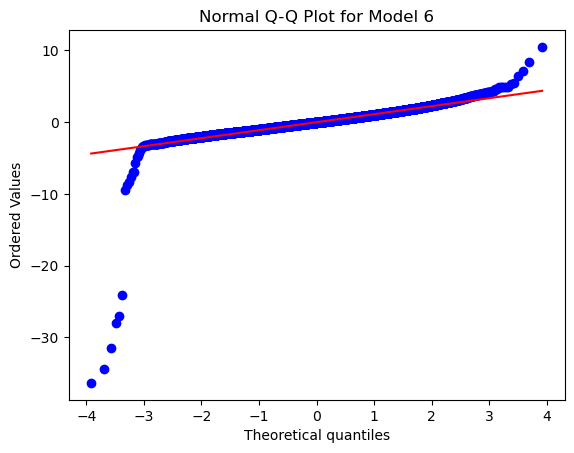

In [64]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    plt.figure()
    stats.probplot(model.resid, dist="norm", plot=plt)
    plt.title(f"Normal Q-Q Plot for Model {idx}")
    plt.show()

Most of the residuals in all six models falling along the red line indicate a relatively normal distribution for the central range of the residuals. This suggests that the majority of the data behaves somewhat normally

The heavy negative tail suggests that in the extreme lower end of residuals, there might be values lower than what a normal distribution would predict. This deviation from normality could indicate outliers or specific patterns in the data that the models fail to capture accurately

### Homoscedasticity

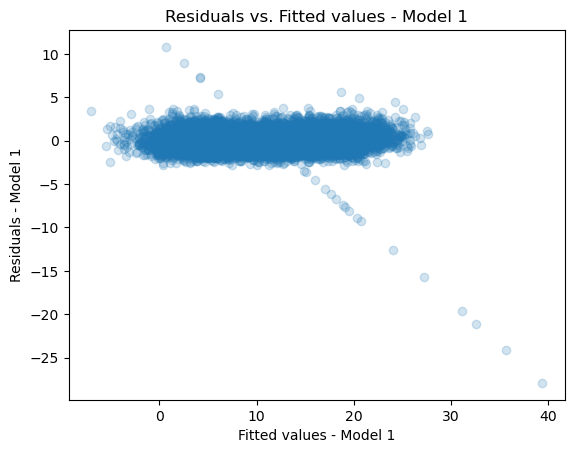

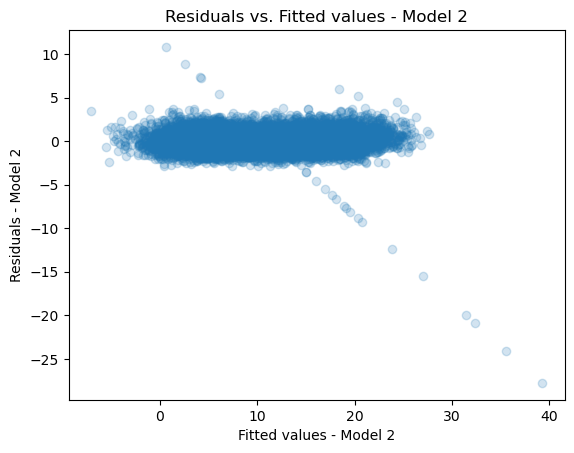

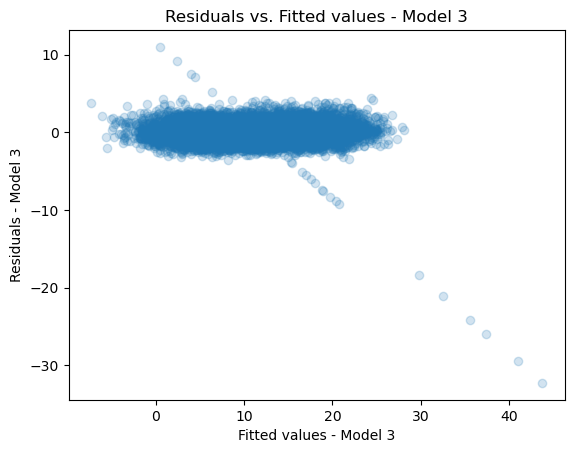

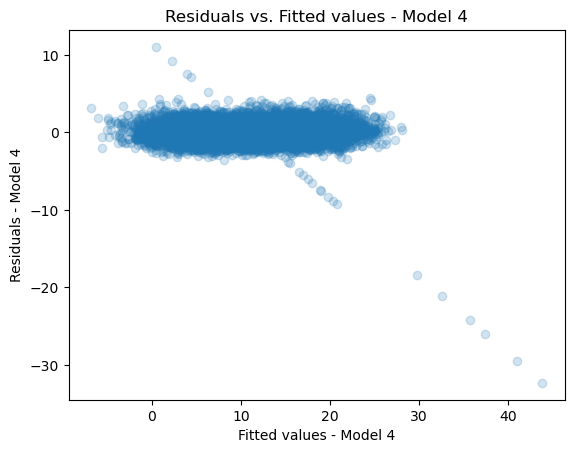

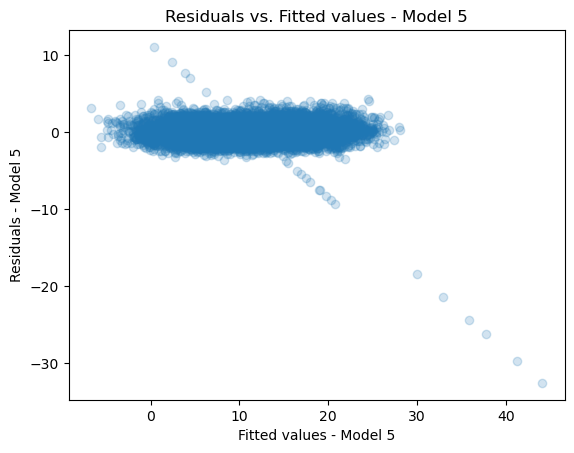

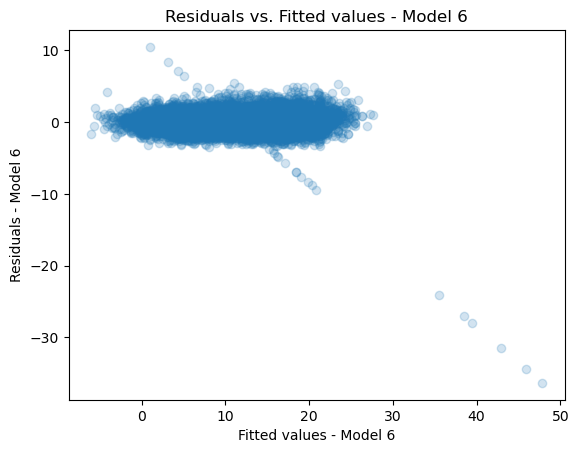

In [65]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    plt.figure()
    plt.scatter(model.fittedvalues, model.resid, alpha=0.2)
    plt.xlabel(f'Fitted values - Model {idx}')
    plt.ylabel(f'Residuals - Model {idx}')
    plt.title(f'Residuals vs. Fitted values - Model {idx}')
    plt.show()

## 3. Conclusion

The question I am hoping to address with this dataset is to best accurately predict future `mean_temp` in London. 

Most of the variables are not normally distributed as indicated by the box plots and Q-Q plots.

Homoscedasticity is generally true for most of the data however, the outliers that are there, can be extreme. These deviations suggest areas where the model might underperform, especially if the spread of residuals widens or concentrates at certain predicted values. We see examples of overestimation by the models specifically with `cloud_cover`, `snow_depth`, `year` & `month`.

We'd seen earlier on that the variable `min_temp` has the highest collinearity with our predictor `mean_temp`. 

Our final iteration for our Linear regression model saw us use only two out of the 10 variables, `max_temp` & `min_temp`. This indicated the strongest linearity with the dependant variable `mean_temp`. 

Perhaps the elimination of outliers and the usage of other models may help with improving accuracy.

## 4. Further EDA

There are non linear relationships between the independent and dependent variables that should be explored further.
Based on the graphs seen earlier, `month` has a polynomial relationship with `mean_temp` inidicating the siginficance of the change in seasons. Additionally, we should see if we can visualize how this looks in 3D and understand the relationships between the variables. 
With domain knowledge, we'd be able to remove some of the outliers noted in the dataset. An obvious example could be seen with `max_temp` where there was a value of 120°C, indicating an error in the collection of that data. 
We've replaced the null values earlier with the mean value. Perhaps we should try doing it with the median instead. 
We'd seen that `pressure` seems to have clustering occuring with respect to `mean_temp`. We could explore it further using KNN modelling and test with all the other variables. 
We should aim to have combinations of multiple models addressing both the linear & non-linear relationships in order to provide us the best accuracy in understanding the trend of 'mean_temp' in London.